In [31]:
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from html import unescape
import csv
import gc
import string
import nltk
#from nltk import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords   #remove stopwords
from nltk.stem.porter import PorterStemmer   #stemming
import re
from sklearn.feature_extraction.text import CountVectorizer #BOW
from sklearn.feature_extraction.text import TfidfVectorizer    # Tf-idf
#from gensim.models import Word2Vec 
import nltk
from nltk.tokenize import word_tokenize
import scipy.spatial.distance as scdist
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics                  import silhouette_samples, silhouette_score

In [ ]:
# !pip install jupyter_contrib_nbextensions
# !jupyter contrib nbextension install --user

In [3]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

In [4]:
# nltk.download('WordCloud')
# # nltk.download('punkt')

In [32]:
df= pd.read_csv("/Users/chrisflanagan/Desktop/Computational Linear Algebra /project/dataSources/UkraineTwitter1.csv")
df.head()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,1141800,1466752038960656385,Curtin2Tiffany,I am just like everyone else. The universe ex...,"Colorado, USA",253,40.0,94.0,2021-12-03 12:52:22.000000,1.497725e+18,2022-02-27 00:07:16,5.0,#UkraineRussiaWar Captured Russian soldiers\n\...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",en,NaN,0.0,2022-02-27 00:09:33.084131
1,1141801,1111276809302216710,5ela60,الأب ..الأخ ..الجار ..الحبيب .. السديك,NaN,167,9.0,656.0,2019-03-28 14:40:12.000000,1.497725e+18,2022-02-27 00:07:16,28.0,Like everybody else I am rooting for Ukraine t...,[],en,NaN,0.0,2022-02-27 00:09:33.068011
2,1141802,1364735420236505088,StatistWomen,🇹🇷,Cumhur İttifakı,1771,1766.0,37009.0,2021-02-25 00:35:28.000000,1.497725e+18,2022-02-27 00:07:16,3.0,"#Ukrayna Güvenlik Servisi, #Rus finosu #Kadiro...","[{'text': 'Ukrayna', 'indices': [15, 23]}, {'t...",tr,NaN,0.0,2022-02-27 00:09:33.059979
3,1141803,597779527,OurTurnToRescue,"Issues: Threats to Democracy, Racism, GOP corr...",NaN,4847,4080.0,33666.0,2012-06-02 21:53:59.000000,1.497725e+18,2022-02-27 00:07:16,1.0,We elected a game show host and got a clown. #...,"[{'text': 'Ukraine', 'indices': [63, 71]}]",en,NaN,0.0,2022-02-27 00:09:33.051823
4,1141804,1646145848,DrWAVeSportCd1,"Addicted to News, Music, Cooking, Gardens, Out...",USA,5002,3950.0,466629.0,2013-08-04 21:07:08.000000,1.497725e+18,2022-02-27 00:07:16,277.0,Ukrainian soldiers wearing sunflowers in their...,"[{'text': 'Ukraine', 'indices': [122, 130]}, {...",en,NaN,0.0,2022-02-27 00:09:33.043812


In [33]:
df = df[df["language"]== "en"]
df.reset_index(drop=True, inplace=True)
df.shape

(46855, 18)

In [34]:
df = df[['text','retweetcount']].sort_values(by = 'retweetcount', ascending=False)
df.drop_duplicates(subset ="text",
                     keep = 'first', inplace = True)
df.drop(['retweetcount'], axis = 1)
df = df.iloc[:5000,:]
df.head()
df.shape

(5000, 2)

In [35]:
import re
from bs4 import BeautifulSoup
from html import unescape

def remove_urls(x):
    cleaned_string = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', str(x), flags=re.MULTILINE)
    return cleaned_string

In [36]:
def unescape_stuff(x):
    soup = BeautifulSoup(unescape(x), 'lxml')
    return soup.text

In [37]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [38]:
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9]+", ' ', x)
    return cleaned_string 

In [39]:
def remove_hashtags(x):
    cleaned_string = re.sub("#[A-Za-z0-9_]+","", x)
    return (cleaned_string)

In [40]:
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string

In [49]:
def remove_numbers(x):
    cleaned_string = re.sub('\d+', '',x)
    return cleaned_string

In [50]:
from nltk.corpus import stopwords
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(remove_urls)
df['text'] = df['text'].apply(unescape_stuff)
df['text'] = df['text'].apply(deEmojify)
df['text'] = df['text'].apply(remove_hashtags)
df['text'] = df['text'].apply(remove_symbols)
df['text'] = df['text'].apply(unify_whitespaces)
df['text'] = df['text'].apply(remove_numbers)
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))


In [55]:
# Stemming document
# from nltk.stem.snowball import SnowballStemmer
# snow_stemmer = SnowballStemmer(language='english')
# stemmed = []
# for w in df['text']:
#     x = snow_stemmer.stem(w)
#     stemmed.append(x)
# stemmed
print(df['text'].tail())

27834    first time russia recognized losses war ukrain...
9860     magomed one ramzan top warlords killed action ...
45479    soldiers anti tank weapons saying feed russian...
37616    mcfaul agree day grace period emergency putin ...
42436    destruction convoy chechen special forces near...
Name: text, dtype: object


In [56]:
# TF-IDF to bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
# print ("Feature Names: \n",vect.get_feature_names())
bow = vect.fit_transform(stemmed)
# print ("Data Type of variable bow:",type(bow))
# print("\n Bag of words sparse matrix:\n",bow)
X = bow.toarray()
words = np.array(vect.get_feature_names())
print("Bag of words matrix: \n", X, words)

Bag of words matrix: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] ['00' '000' '00001' ... 'zr' 'zvezda' 'zvikaklein']


In [18]:
# Visualize the sparce coo matrix
# from scipy.sparse import coo_matrix
# from scipy.sparse import csr_matrix
# import scipy.sparse as sps
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
# from scipy.sparse import coo_matrix

# def plot_coo_matrix(m):
#     if not isinstance(m, coo_matrix):
#         m = coo_matrix(m)
#     fig = plt.figure(figure(figsize=(12,10), dpi=80))
#     ax = fig.add_subplot(111, facecolor='white')
#     ax.plot(m.col, m.row, 's', color='black', ms=1)
#     ax.set_xlim(0, m.shape[1])
#     ax.set_ylim(0, m.shape[0])
#     ax.set_aspect('equal')
#     for spine in ax.spines.values():
#         spine.set_visible(False)
#     ax.invert_yaxis()
#     ax.set_aspect('equal')
#     ax.set_xticks([])
#     ax.set_yticks([])
#     return ax

# m = coo_matrix(X)
# ax = plot_coo_matrix(m)
# # convert to csr and use spy
# ax


In [19]:
# comment_words = ''
# for val in df['text']:
      
#     # typecaste each val to string
#     val = str(val)
  
#     # split the value
#     tokens = val.split()
      
#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()
      
#     comment_words += " ".join(tokens)+" "
  
# wordcloud = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 min_font_size = 10,
#                 collocations = False).generate(comment_words)
  
# # plot the WordCloud image                       
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
  
# plt.show()

In [57]:
from scipy import linalg
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
vectors = vect.fit_transform(df['text']).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape
%time U, s, Vh = linalg.svd(vectors, full_matrices=False) 

CPU times: user 8min 48s, sys: 6.01 s, total: 8min 54s
Wall time: 1min 56s


In [24]:
print(U.shape, s.shape, Vh.shape)

(5000, 5000) (5000,) (5000, 10643)


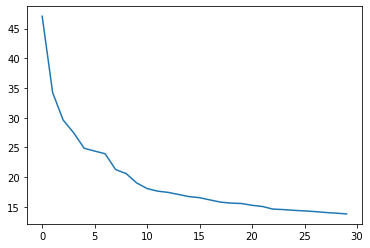

In [27]:
import matplotlib.pyplot as plt
plt.plot(s[:30])

In [28]:
# do NMF
from sklearn.decomposition import NMF
nmf = NMF(n_components=6, solver="mu")
W = nmf.fit_transform(X)
H = nmf.components_

for i, topic in enumerate(H):
     print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words[topic.argsort()[-10:]]])))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Topic 1: world,country,people,like,rt,stand,support,ukrain,russia,ukraine
Topic 2: kyiv,near,video,forces,army,soldier,soldiers,captured,ukrainian,russian
Topic 3: want,pleas,fighting,world,people,protest,end,putin,stop,war
Topic 4: around,tell,using,phone,reading,gatherings,track,turn,geolocation,please
Topic 5: leader,volodymyr,fight,us,ukraine,man,putin,zelensky,hero,president
Topic 6: national,russian,anonymous,happen,broadcast,truth,state,channels,hacked,tv


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
mat_lsa = lsa.fit_transform(X)
print("Explained variance of the SVD: {}%".format(int(svd.explained_variance_ratio_.sum() * 100)))
print(mat_lsa)

In [ ]:
from sklearn.cluster import KMeans
k = 20
score = []
for i in range(1,k + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(mat_lsa)
    score.append(kmeans.inertia_)
plt.plot(range(1,k + 1 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

In [ ]:
k = 7
#these are all default options (except for k)
model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(mat_lsa)

In [ ]:
clusters = model.predict(mat_lsa)

In [ ]:
df["ClusterName"] = clusters
df.head()

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs


def plotWords(dfs, n_feats):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(8, 2))
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])

dfs = get_top_features_cluster(bow.toarray(), prediction, 4)
plotWords(dfs, 4)


In [ ]:
%time km.fit(DTM_tfidf_lsa)


In [ ]:
from sklearn import cluster
k = 10
kmeans_results = run_KMeans(k, mat)

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vect.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

In [ ]:
best_result = 10
kmeans = kmeans_results.get(best_result)

final_df_array = mat
prediction = kmeans.predict(mat)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(mat)
plt.scatter(mat[:,0], mat[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()